In [1]:
import requests
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set_style("darkgrid")

In [2]:
import datapane as dp

In [3]:
#game data
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

r = requests.get(url)

json_data = r.json()

elements_df = pd.DataFrame(json_data['elements'])
elements_types_df = pd.DataFrame(json_data['element_types'])
teams_df = pd.DataFrame(json_data['teams'])

In [4]:
json_data.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [5]:
json_data['total_players']

7899518

In [6]:
url = 'https://fantasy.premierleague.com/api/leagues-classic/872868/standings/'

r = requests.get(url)

league = r.json()

df_league = pd.DataFrame(league['standings']['results'])

df_league

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name
0,23277357,48,James Rivers,1,1,1,1260,1065573,Balsamic Vinagre
1,36423051,39,Ted Rosner,2,2,2,1241,260799,Grabban by Debuchy
2,38810568,46,George Baker Baker,3,3,3,1229,3962148,Warnocked Out
3,24183778,30,Leo Anthias,4,5,4,1199,3962240,OrigiASM
4,23483387,43,Pete Stebbing,5,7,5,1194,1591768,Diego Marrastebbo
5,25060316,10,Sam Guest,6,4,6,1191,4032730,lads lads lads
6,28025617,30,Henry Turnbull,7,8,7,1180,16866,Turnbull’s Revenge
7,30449535,9,Robert Shannon,8,6,8,1172,4811871,Abbeville Rovers
8,38295560,40,A A,9,9,9,1154,4914782,Nanas Squad
9,23273307,56,Henry Elks,10,11,10,1148,1416663,Debbie Does Gallas


In [7]:
url = 'https://fantasy.premierleague.com/api/entry/4914782/history/'
r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['current', 'past', 'chips'])

In [8]:
pd.DataFrame(json['past'])

,season_name,total_points,rank
0,2018/19,1824,3862562
1,2019/20,1898,3108475


In [9]:
df_all = pd.DataFrame(columns=['event', 'points', 'total_points', 'rank', 'rank_sort', 'overall_rank',
       'bank', 'value', 'event_transfers', 'event_transfers_cost',
       'points_on_bench', 'player','team_name'])
# get all players data from a league
for i, val in enumerate(df_league.entry):
    url = 'https://fantasy.premierleague.com/api/entry/{}/history/'.format(val)

    r = requests.get(url)

    json = r.json()

    df_temp=pd.DataFrame(json['current'])
    print(val,df_league.iloc[i,2],df_league.iloc[i,8])
    df_temp['player'] = df_league.iloc[i,2]
    df_temp['team_name'] = df_league.iloc[i,8]
    df_all= pd.concat([df_all,df_temp])
    

1065573 James Rivers Balsamic Vinagre
260799 Ted Rosner Grabban by Debuchy
3962148 George Baker Baker Warnocked Out
3962240 Leo Anthias OrigiASM
1591768 Pete Stebbing Diego Marrastebbo
4032730 Sam Guest lads lads lads
16866 Henry Turnbull Turnbull’s Revenge
4811871 Robert Shannon Abbeville Rovers
4914782 A A Nanas Squad
1416663 Henry Elks Debbie Does Gallas
1786332 Nick Sissling Fiddler on the Huth
1409005 Luke Betham Nanas Squad


In [10]:
# cleaning
for col in df_all:
    try:
        df_all[col]=df_all[col].astype(float)
    except:
        pass
    
df_all['player'] = df_all['player'].apply(lambda x: "Alex Andreou" if x == "A A" else x)
df_all['player'] = df_all['player'].apply(lambda x: "Turnbull" if x == "Henry Turnbull" else x)
df_all['player'] = df_all['player'].apply(lambda x: "Elks" if x == "Henry Elks" else x)
df_all['player'] = df_all['player'].apply(lambda x: x.split()[0])

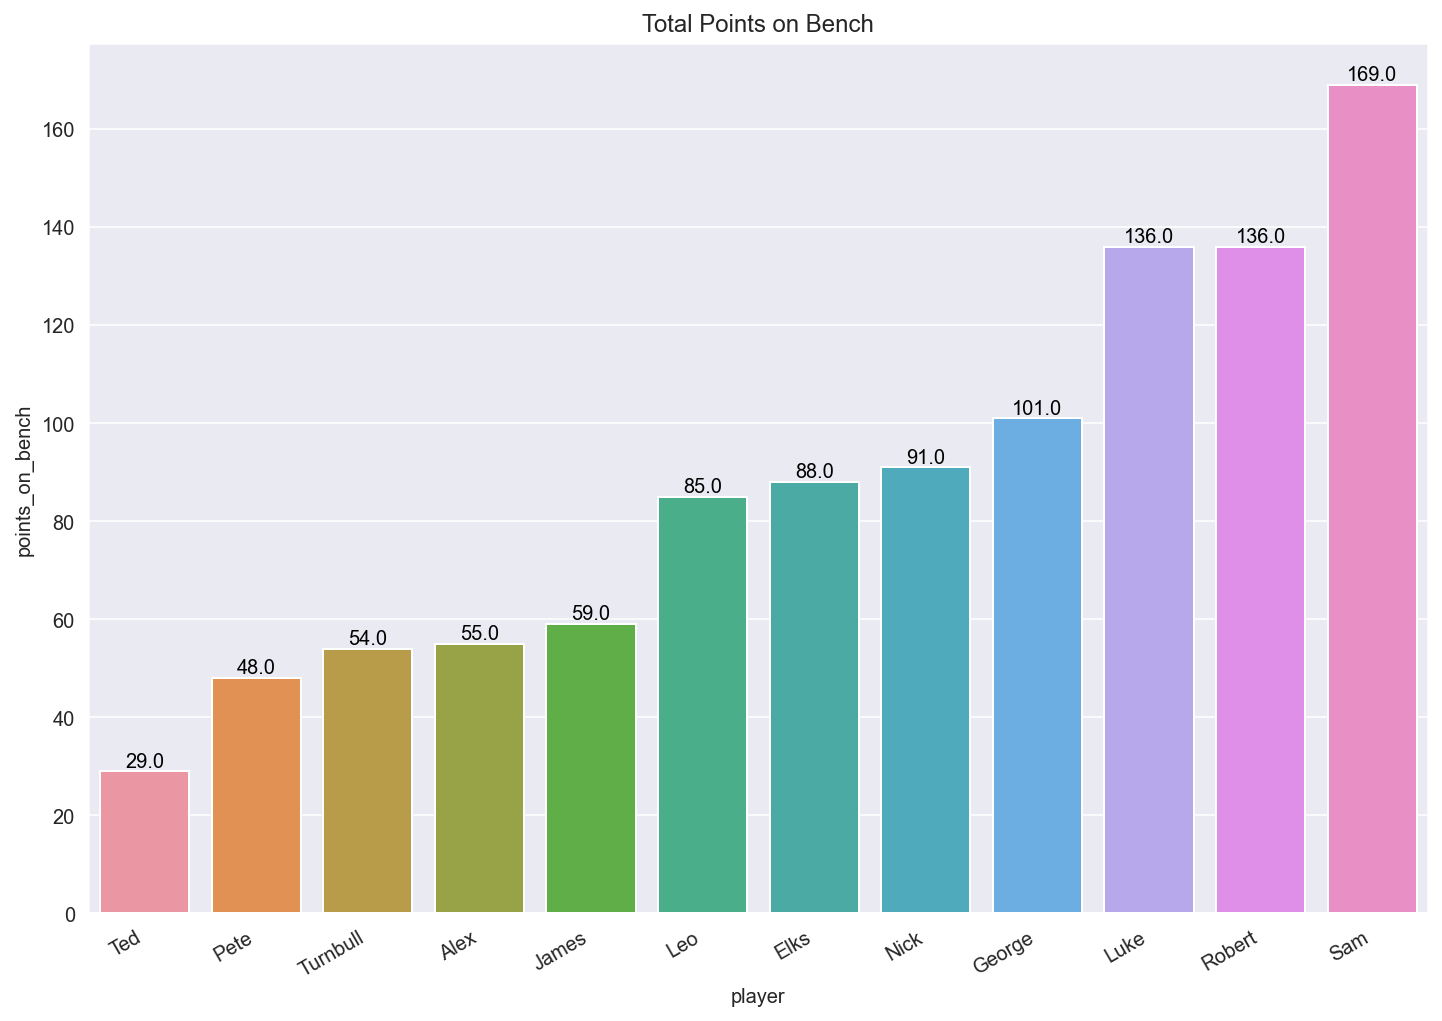

In [11]:
# Total points on Bench
df_temp = df_all.groupby('player').sum()[['points_on_bench']].sort_values('points_on_bench')
plt.figure(figsize=(12,8))
bench_chart=sns.barplot(y=df_temp.points_on_bench,x=df_temp.index)
plt.title("Total Points on Bench")
plt.xticks(rotation=30,ha="right")
for p in bench_chart.patches:
    bench_chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

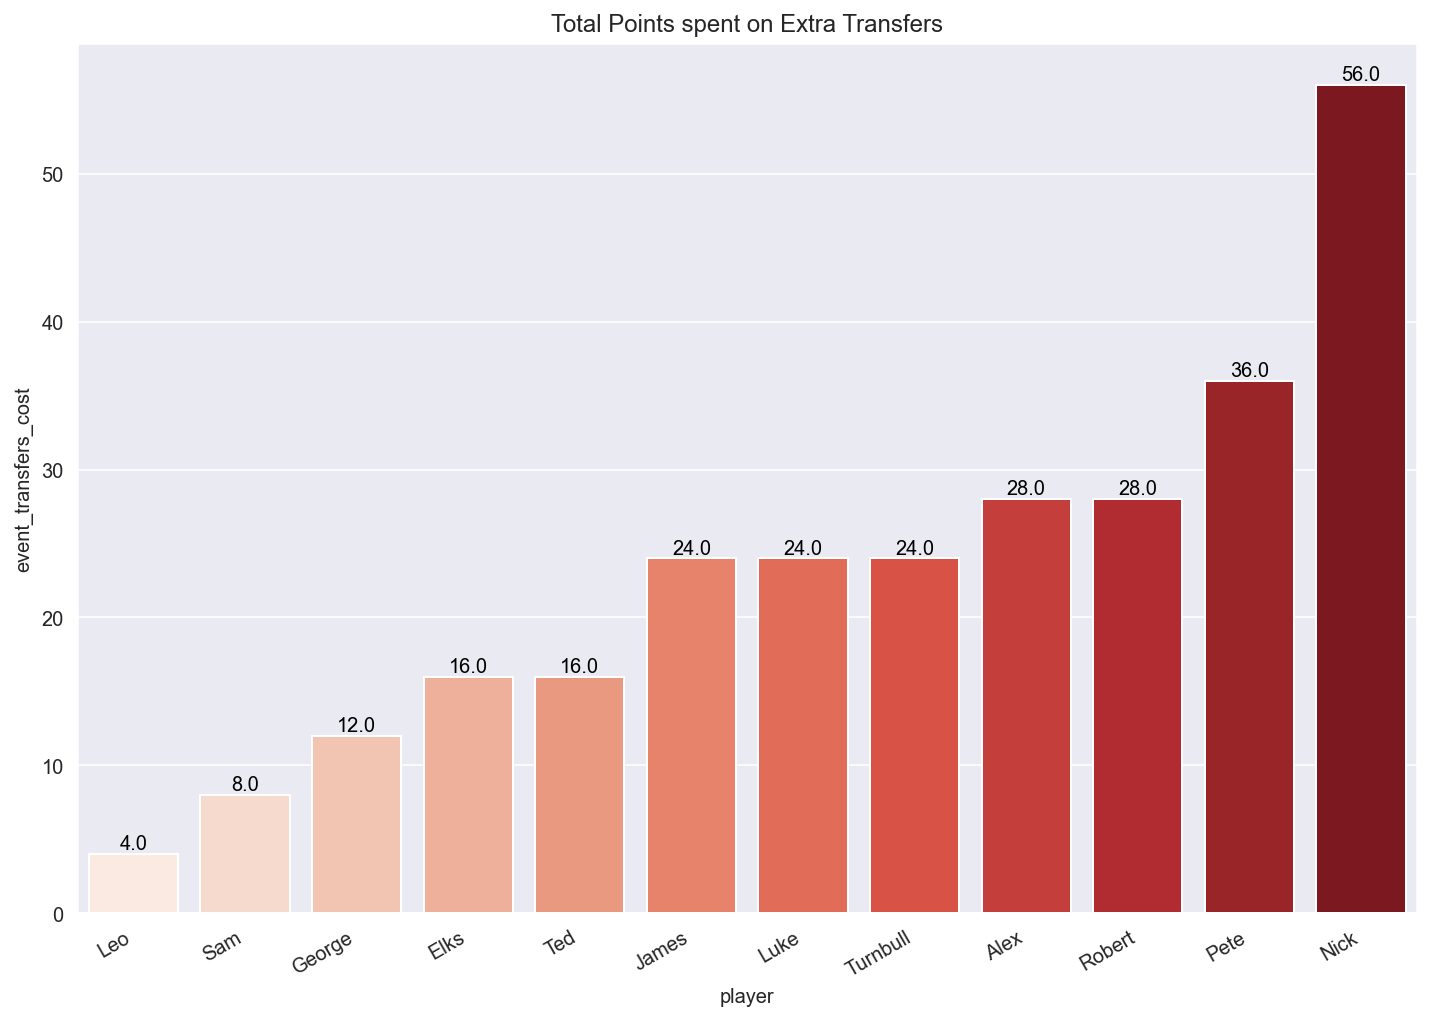

In [12]:
# Extra Transfers cost
df_temp = df_all.groupby('player').sum()[['event_transfers_cost']].sort_values('event_transfers_cost')
plt.figure(figsize=(12,8))
x_transfers = sns.barplot(y=df_temp.event_transfers_cost,x=df_temp.index,palette='Reds')
plt.title("Total Points spent on Extra Transfers")
plt.xticks(rotation=30,ha="right")
for p in x_transfers.patches:
    x_transfers.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

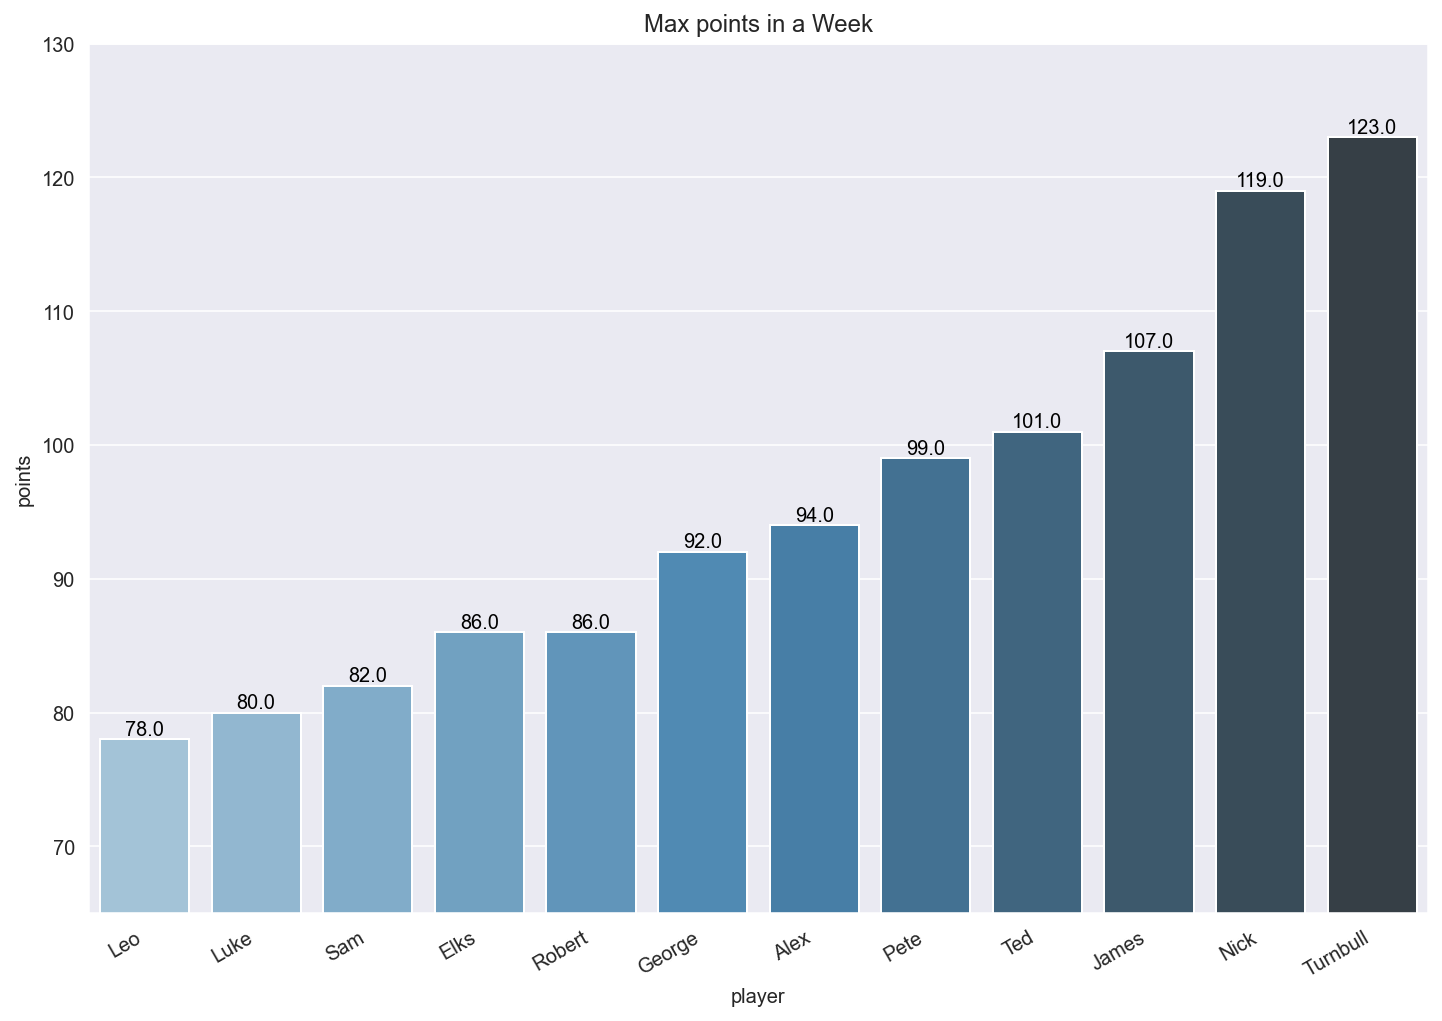

In [15]:
# Max points in a week
df_temp = df_all.groupby('player').max()[['points']].sort_values('points')
plt.figure(figsize=(12,8))
max_week = sns.barplot(y=df_temp.points,x=df_temp.index,palette='Blues_d')
plt.title("Max points in a Week")
plt.xticks(rotation=30,ha="right")
for p in max_week.patches:
    max_week.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.ylim(65,130)
plt.show()

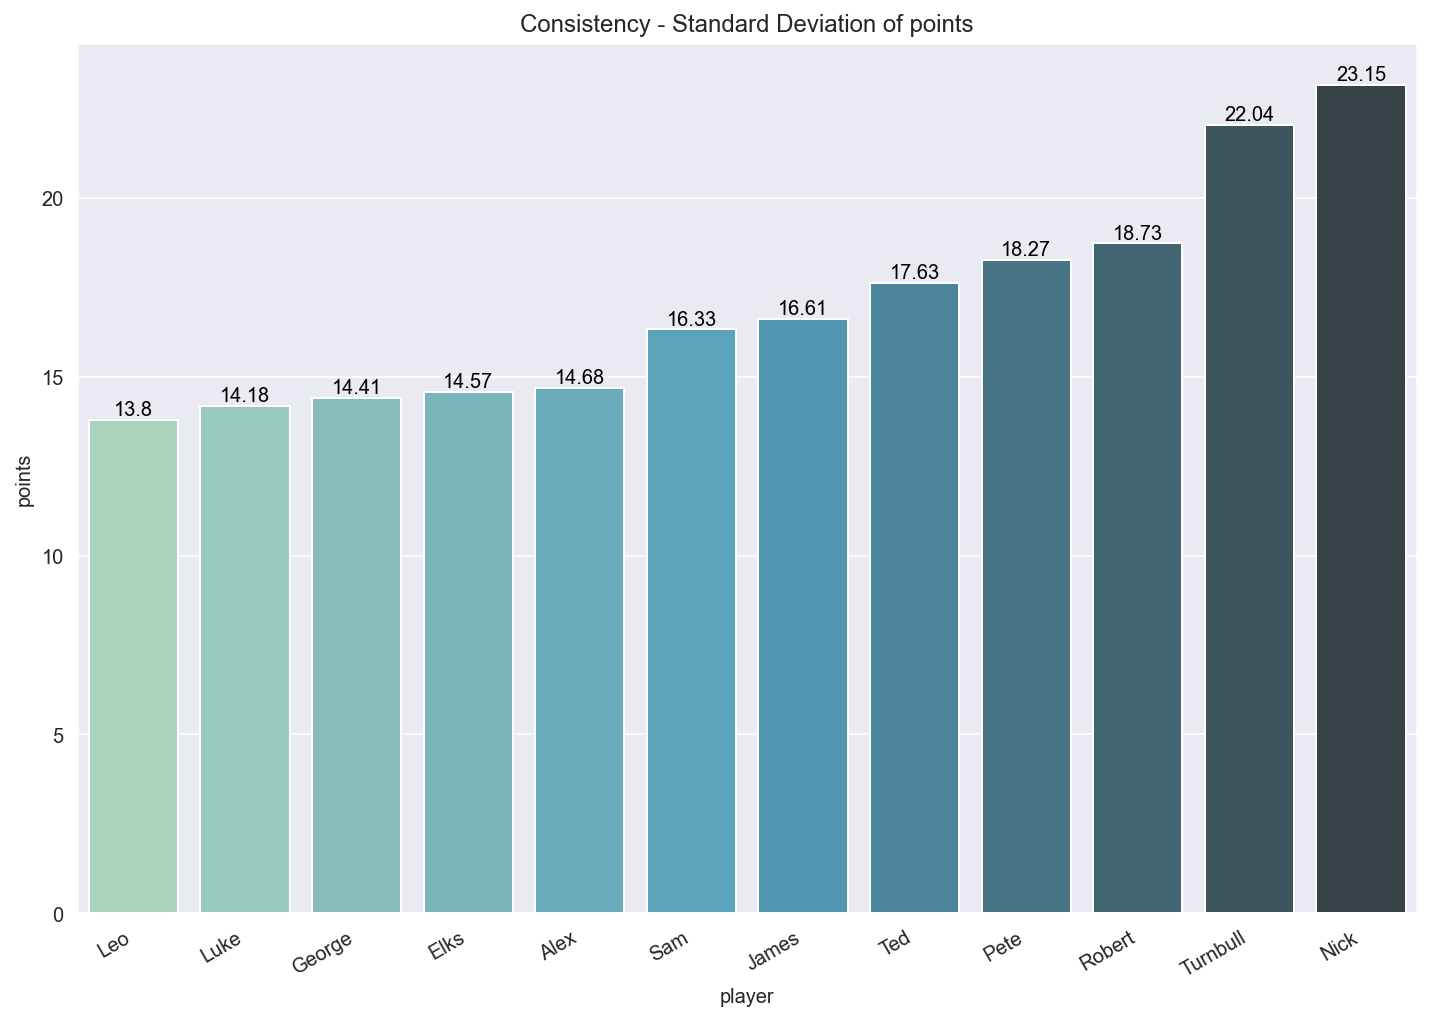

In [16]:
# Std dev points 
df_temp = df_all.groupby('player').std()[['points']].sort_values('points')
plt.figure(figsize=(12,8))
consistency=sns.barplot(y=df_temp.points,x=df_temp.index,palette="GnBu_d")
plt.title("Consistency - Standard Deviation of points")
plt.xticks(rotation=30,ha="right")
for p in consistency.patches:
    consistency.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

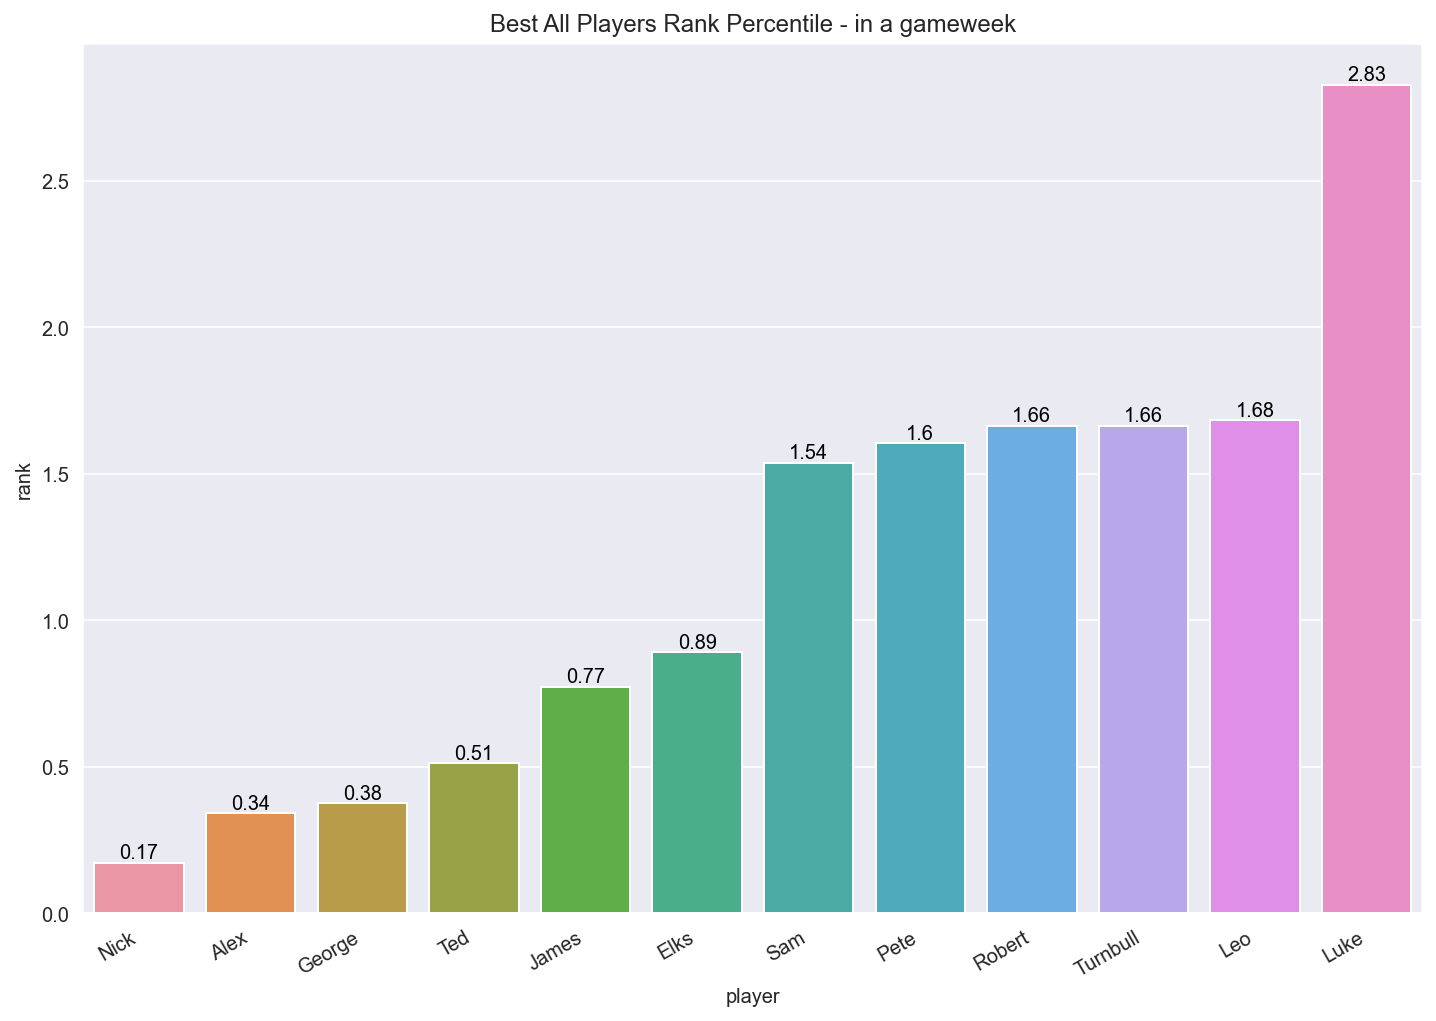

In [17]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').min()[['rank']].sort_values('rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart=sns.barplot(y=df_temp['rank'],x=df_temp.index)
plt.title("Best All Players Rank Percentile - in a gameweek")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

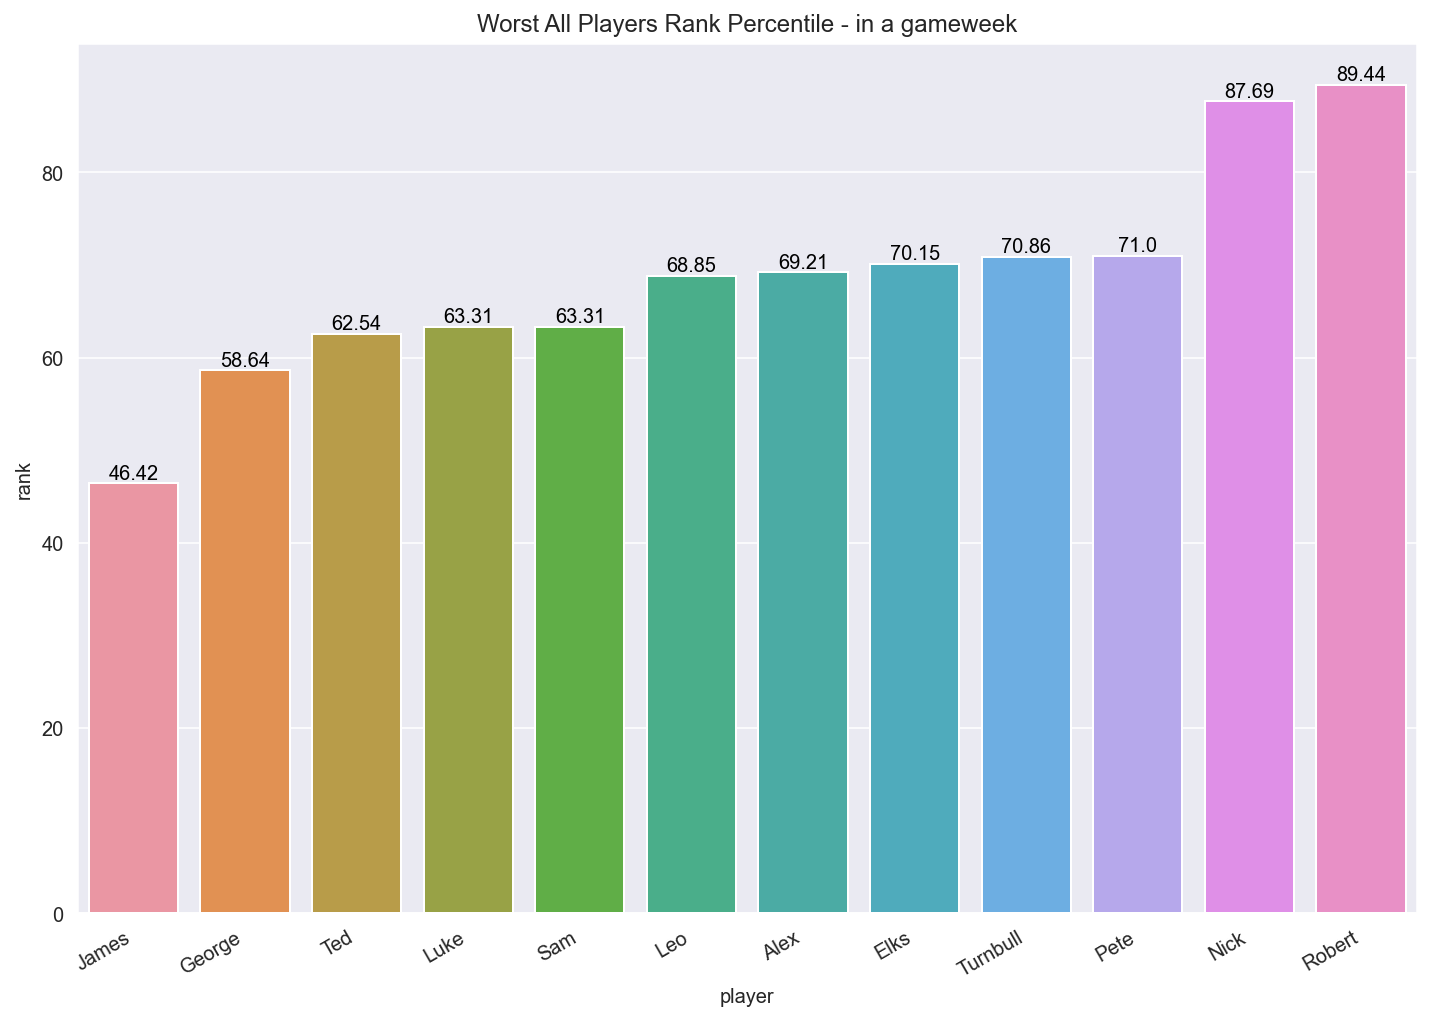

In [18]:
# Worst UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').max()[['rank']].sort_values('rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['rank'],x=df_temp.index)
plt.title("Worst All Players Rank Percentile - in a gameweek")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

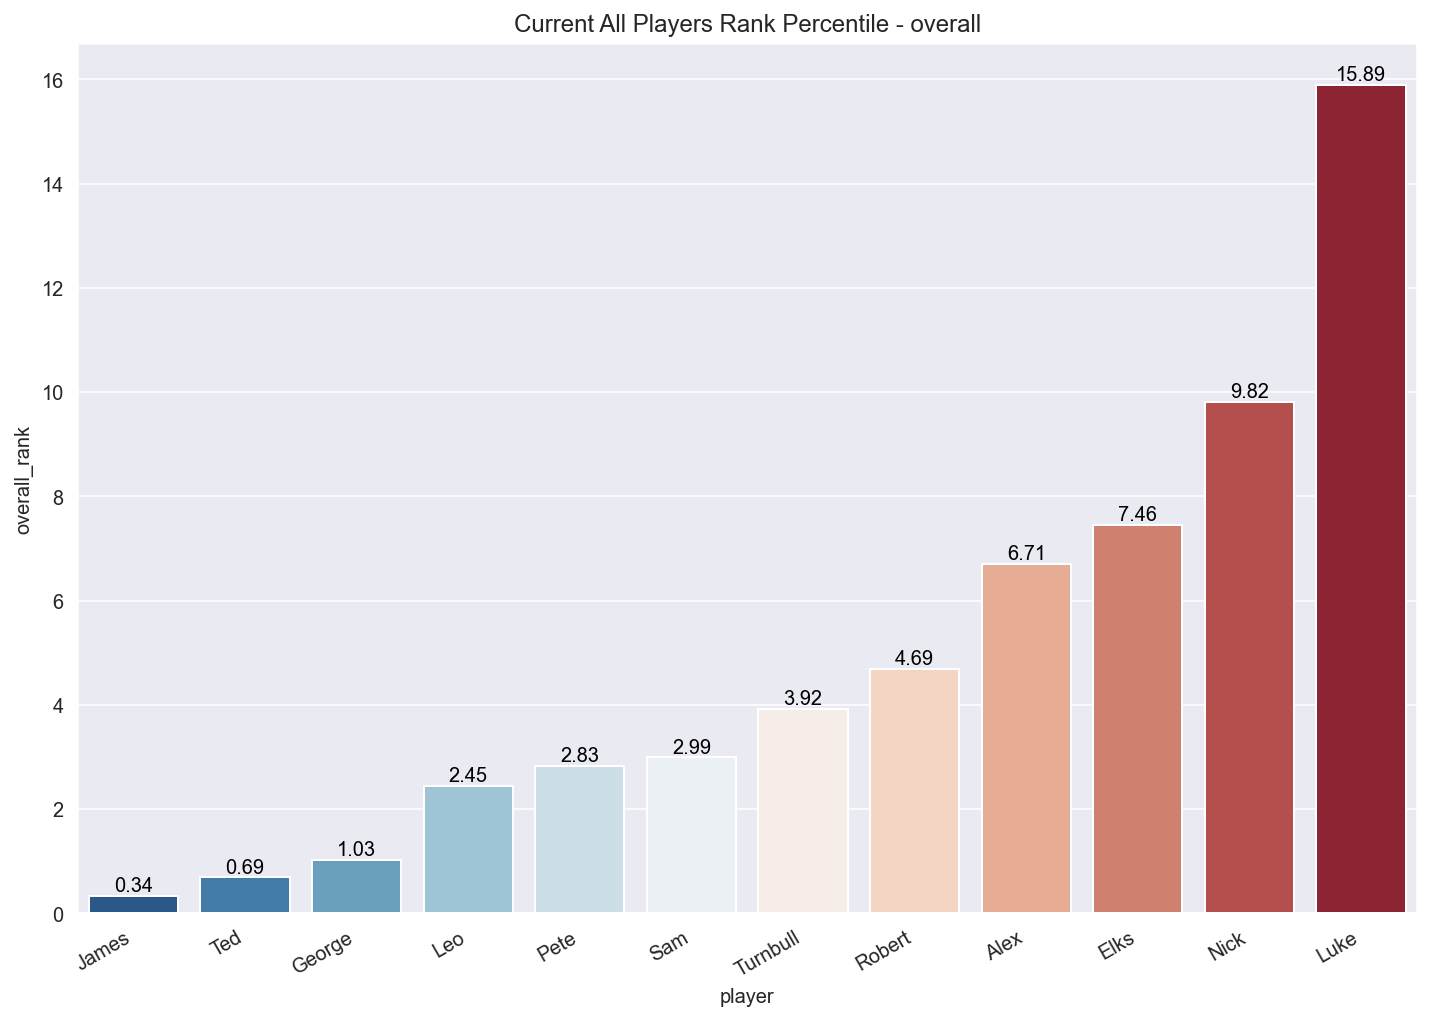

In [19]:
# Current all players rank
df_temp = df_all[df_all['event']==df_all['event'].max()][['overall_rank','player']].sort_values('overall_rank')
df_temp['overall_rank']=df_temp['overall_rank']/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
current_percentile = sns.barplot(y=df_temp['overall_rank'],x=df_temp.player, palette = "RdBu_r")
plt.title("Current All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in current_percentile.patches:
    current_percentile.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

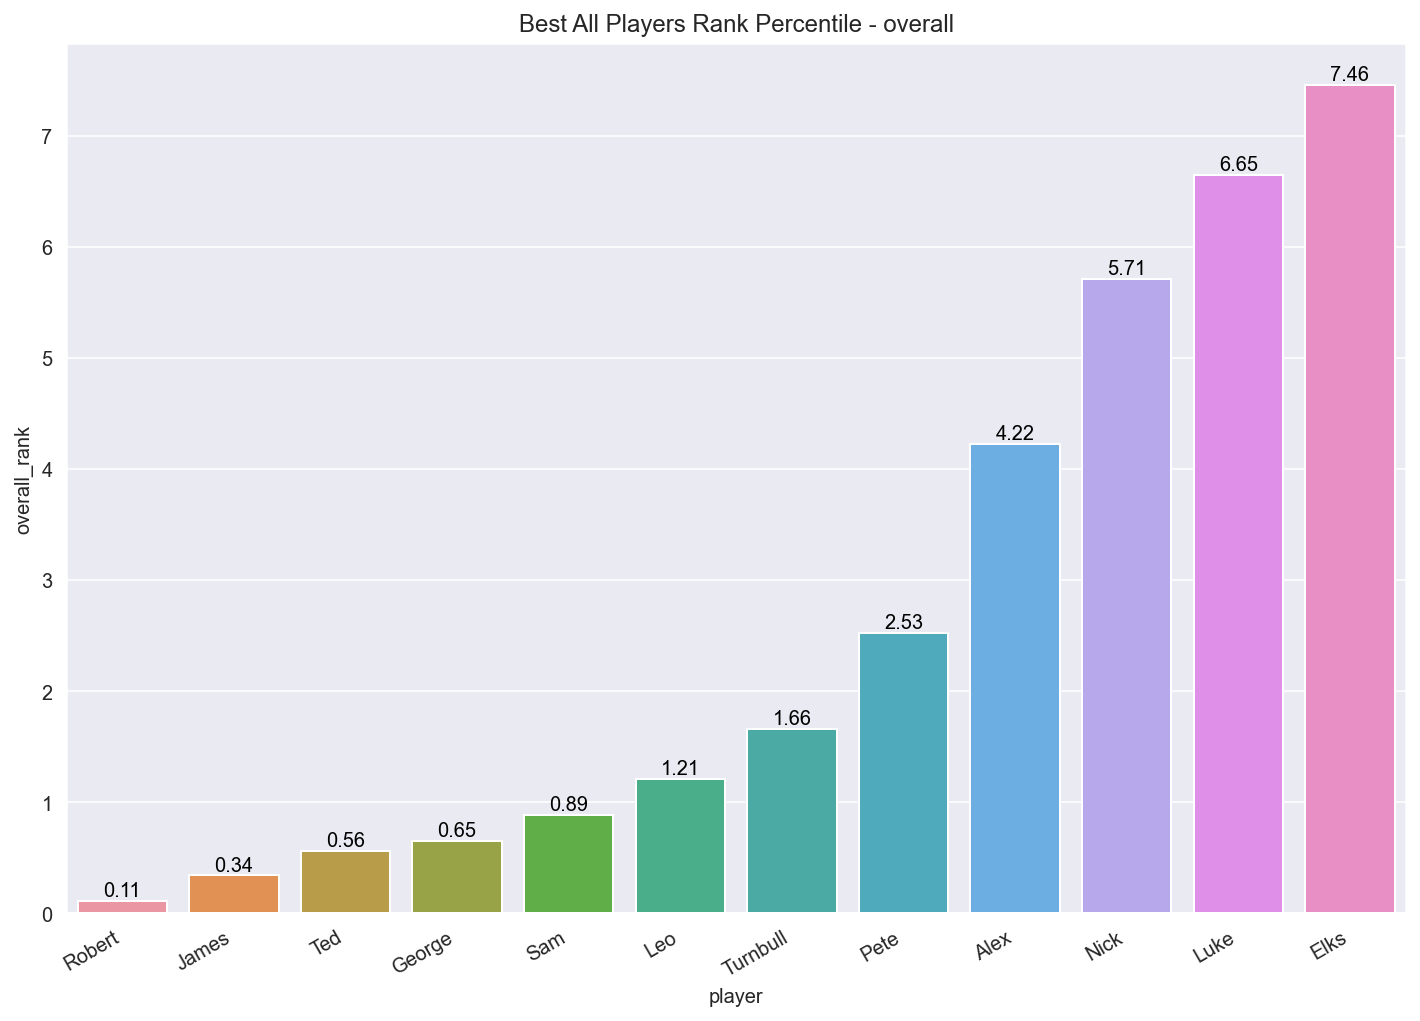

In [20]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').min()[['overall_rank']].sort_values('overall_rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['overall_rank'],x=df_temp.index)
plt.title("Best All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

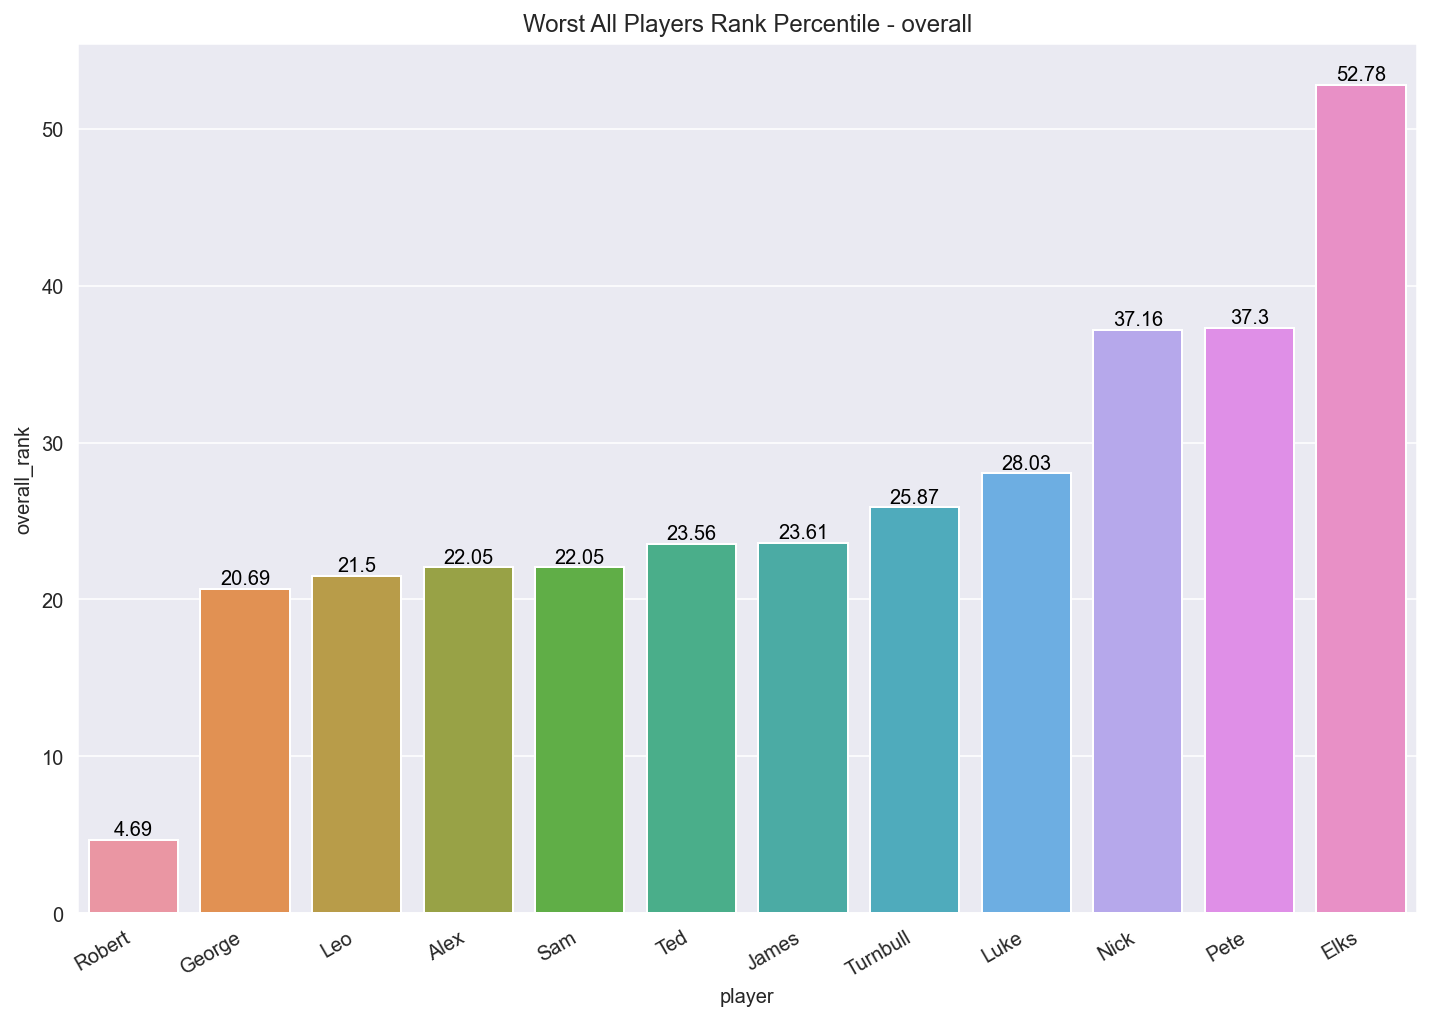

In [21]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').max()[['overall_rank']].sort_values('overall_rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['overall_rank'],x=df_temp.index)
plt.title("Worst All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

In [22]:
df_all = df_all.sort_values(by='event')
rank_list = []
for e in df_all.event.unique():
    df_temp = df_all[df_all.event==e]
    rank_list+=df_temp.total_points.rank(method='min',ascending=False).tolist()

In [23]:
df_all['rankpw']=rank_list

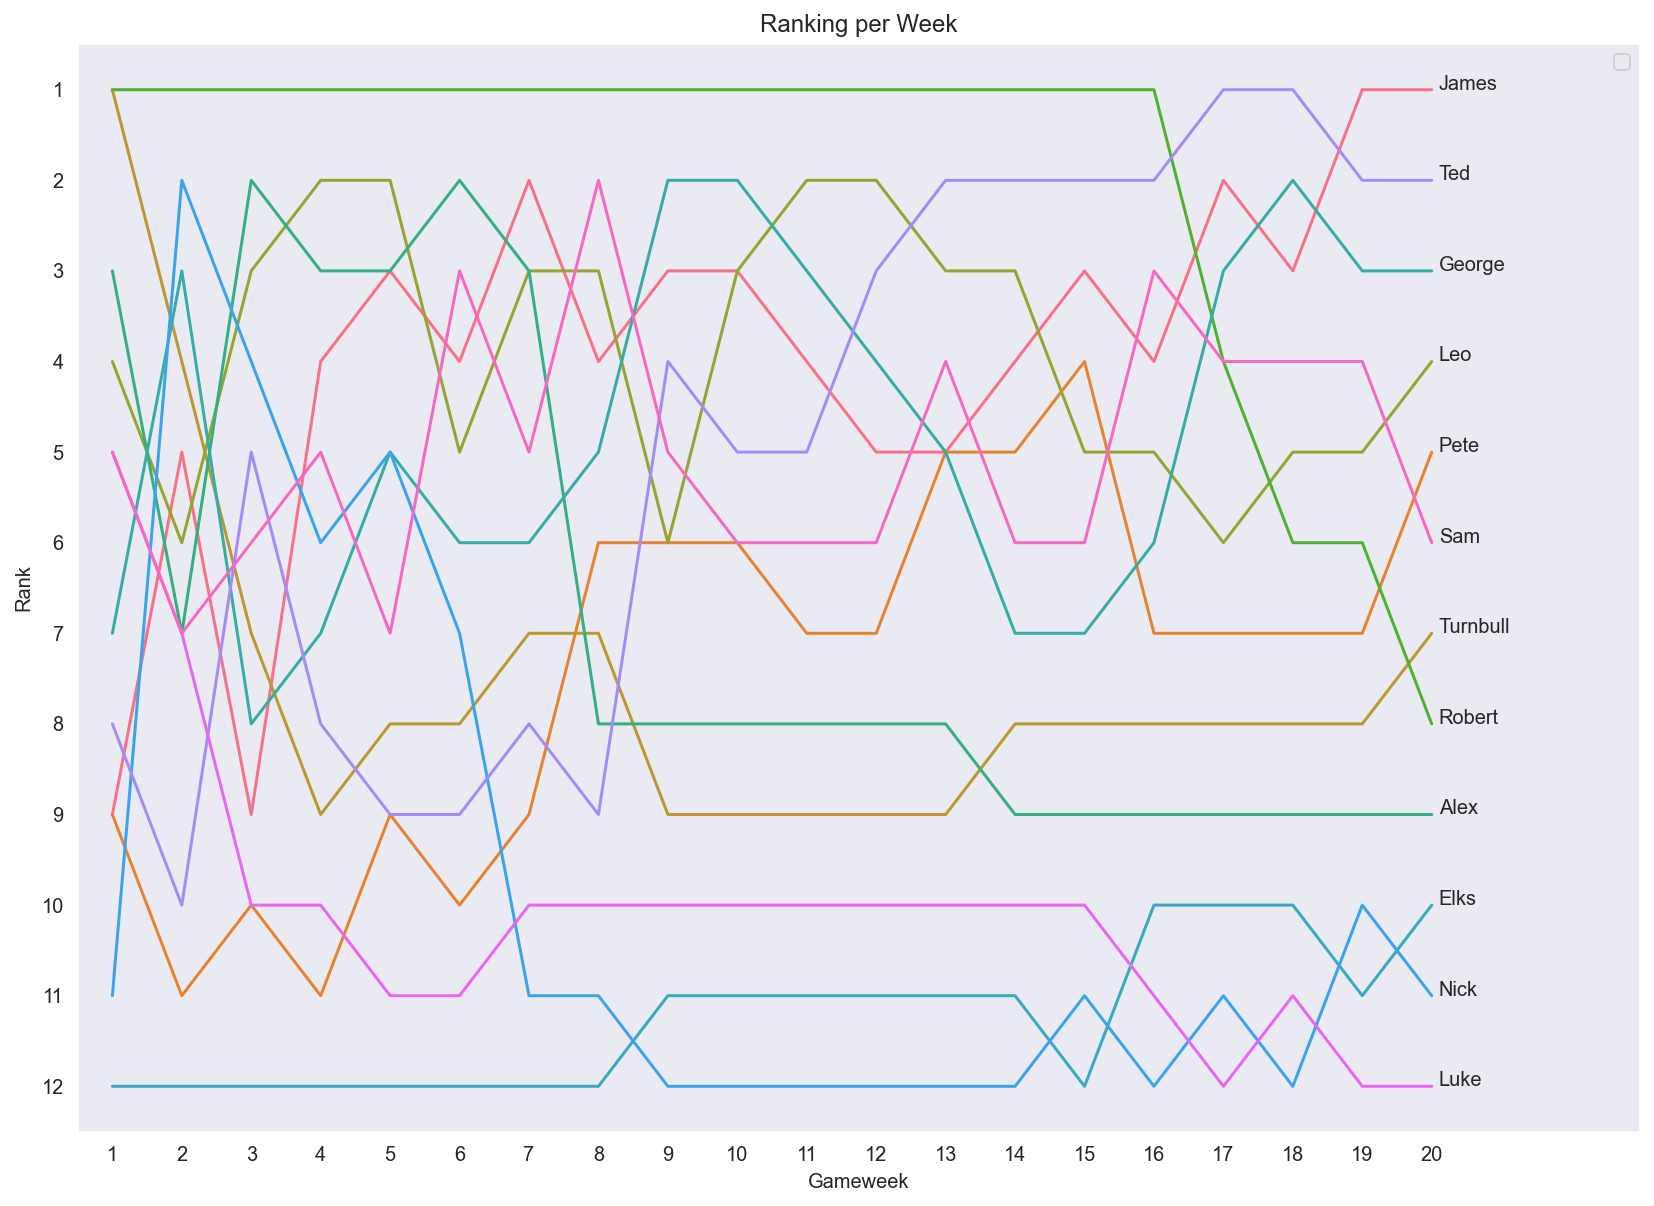

In [29]:
gw = 20
curr_rank_list = df_all[df_all.event==20].sort_values("total_points",ascending=False)["player"].tolist()
sns.set_style('dark')
plt.figure(figsize=(14,10))
ranking=sns.lineplot(y=df_all.rankpw,x=df_all.event,hue=df_all.player)
for i, name in enumerate(curr_rank_list):
    ranking.annotate(name,(gw+0.1,i+1))
plt.yticks(range(1,13))
plt.xticks(range(1,gw+1))
plt.xlim(0.5,gw+3)
plt.ylim(12.5,0.5)
plt.title("Ranking per Week")
plt.xlabel("Gameweek")
plt.ylabel("Rank")
plt.legend("")
plt.show()

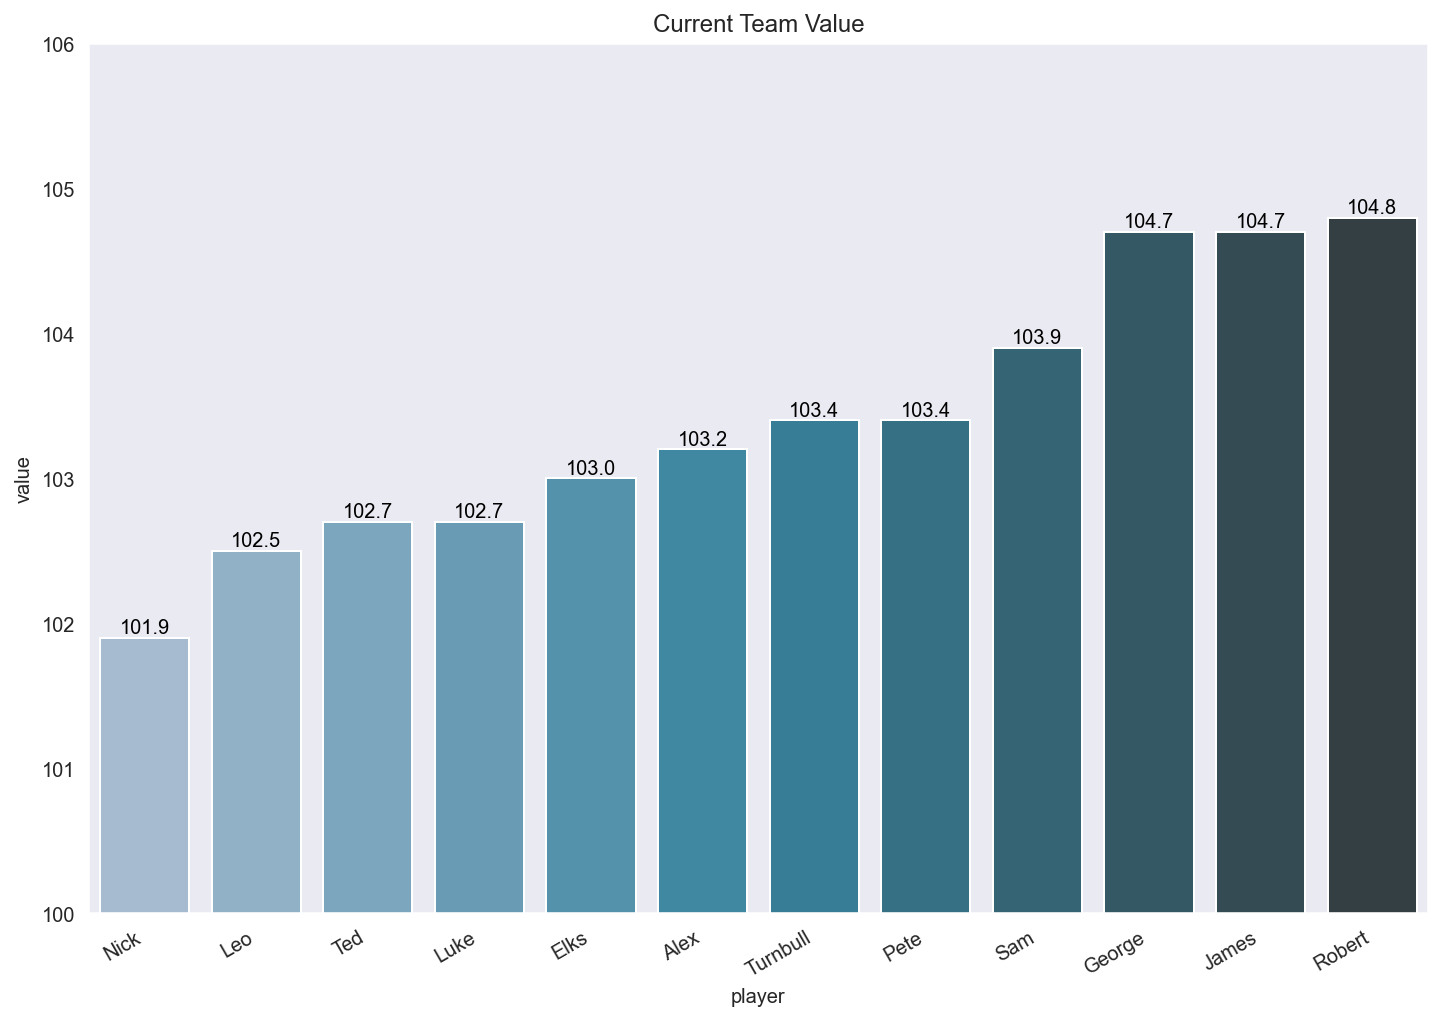

In [31]:
# Current team value
df_temp = df_all[df_all['event']==df_all['event'].max()][['value','bank','player']].sort_values('value')
# df_temp['']
plt.figure(figsize=(12,8))
team_value = sns.barplot(y=df_temp['value']/10,x=df_temp.player,palette='PuBuGn_d')
plt.title("Current Team Value")
plt.xticks(rotation=30,ha="right")
for p in team_value.patches:
    team_value.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.ylim(100,106)
plt.show()

In [32]:
## Publishing to datapane

In [33]:
dp.login(token="091830a120b8c1f1cde36fd23c9e06d4b81bfc6b")
r = dp.Report(
    f'### LukeStepsUp FPL League',
    f'Graphing the most important league in FPL',
    dp.Plot(ranking),
    dp.Plot(bench_chart),
    dp.Plot(x_transfers),
    dp.Plot(max_week),
    dp.Plot(consistency),
    dp.Plot(current_percentile),
    dp.Plot(team_value)
)

Connected successfully to https://datapane.com as lukebetham


In [34]:
r.publish(name=f'FPL League Rankings', open=True, description=f'')

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/lukebetham/reports/fpl-league-rankings/


In [91]:
df_all[df_all.event==1].total_points.rank(method='min',ascending=False)

0     8.0
0     9.0
0     4.0
0    11.0
0     9.0
0     5.0
0     1.0
0     3.0
0     1.0
0     7.0
0     5.0
0    12.0
Name: total_points, dtype: float64

In [92]:
df_all[df_all['event']==14]

,event,points,total_points,rank,rank_sort,overall_rank,bank,value,event_transfers,event_transfers_cost,points_on_bench,player,team_name,rankpw
13,14.0,78.0,772.0,1227983.0,1236733.0,1993664.0,3.0,1022.0,1.0,0.0,1.0,Henry,Debbie Does Gallas,11.0
13,14.0,75.0,851.0,1529421.0,1565282.0,364058.0,1.0,1038.0,0.0,0.0,3.0,George,Warnocked Out,7.0
13,14.0,77.0,856.0,1375748.0,1388739.0,308143.0,1.0,1028.0,2.0,0.0,5.0,Sam,lads lads lads,6.0
13,14.0,84.0,760.0,603725.0,613887.0,2334557.0,0.0,1013.0,0.0,0.0,1.0,Nick,Fiddler on the Huth,12.0
13,14.0,84.0,860.0,603725.0,612892.0,273230.0,4.0,1029.0,0.0,0.0,1.0,Pete,Diego Marrastebbo,5.0
13,14.0,99.0,895.0,40413.0,40769.0,63848.0,0.0,1019.0,0.0,0.0,0.0,Ted,Grabban by Debuchy,2.0
13,14.0,88.0,864.0,387181.0,389629.0,237506.0,0.0,1032.0,2.0,0.0,0.0,James,Balsamic Vinagre,4.0
13,14.0,79.0,790.0,1114413.0,1123054.0,1526877.0,3.0,1018.0,1.0,0.0,10.0,Luke,Nanas Squad,10.0
13,14.0,87.0,803.0,446331.0,446409.0,1208177.0,2.0,1025.0,2.0,4.0,0.0,Henry,Turnbull’s Revenge,8.0
13,14.0,57.0,794.0,4437490.0,4461473.0,1424634.0,7.0,1025.0,1.0,0.0,1.0,Alex,Nanas Squad,9.0
